In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#1. Get the categorical dataset
df_cat = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\10_KNN\lab-feature-extraction\categorical.csv')

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

,state_arizona,state_california,state_nevada,state_oregon,state_washington,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,...,sales_channel_web,vehicle_class_four-door_car,vehicle_class_luxury_car,vehicle_class_luxury_suv,vehicle_class_suv,vehicle_class_sports_car,vehicle_class_two-door_car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
9130,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


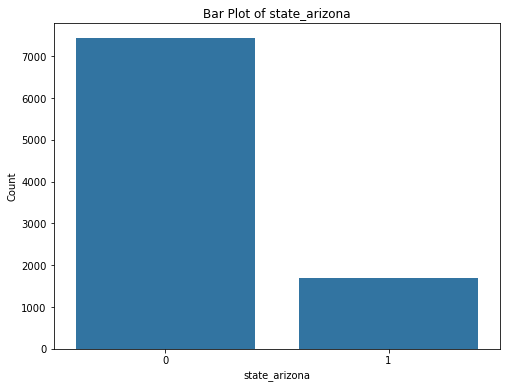

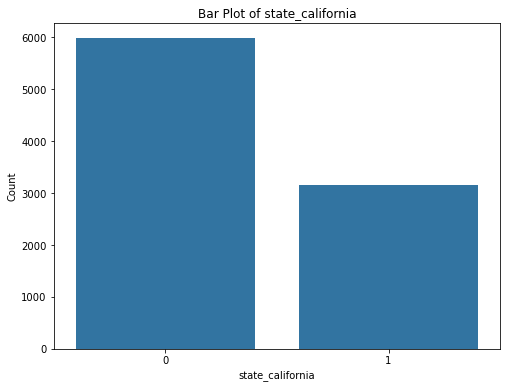

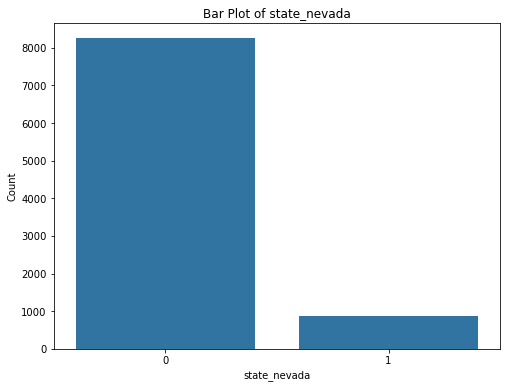

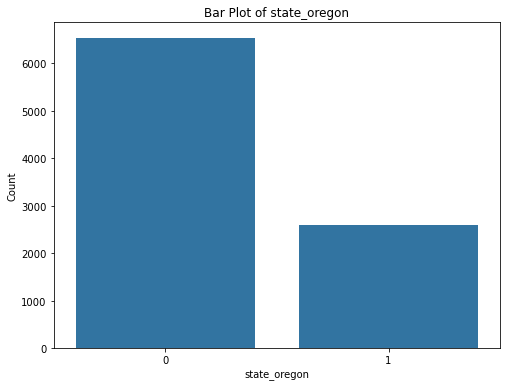

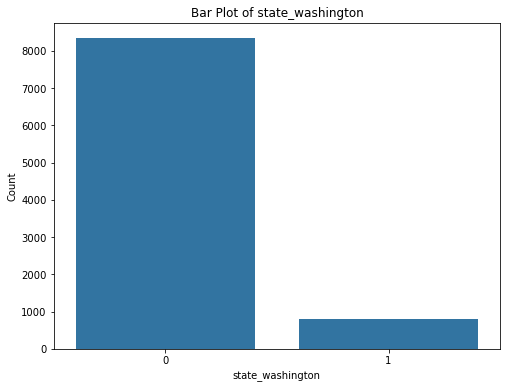

In [5]:
#2. Create plots for all columns
def barplots(dataframe):

    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=dataframe, x=column)
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()
        
barplots(df_cat[['state_arizona', 'state_california', 'state_nevada', 'state_oregon', 'state_washington']])

In [13]:
### from here, I will use the original dataframe, as the hot-one coded are not really useful here

df = pd.read_csv(r'C:\Users\ljant\Desktop\Ironhack\10_KNN\lab-feature-extraction\we_fn_use_c_marketing_customer_value_analysis.csv')

def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [14]:
def column_types (data):
    num_col = df.select_dtypes(include=['int', 'float', 'datetime64']).columns
    cat_col = df.select_dtypes(include=['object']).columns
    return num_col, cat_col

df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')
df_cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [15]:
# Preparing df_cat and dropping redundant columns
df_cat = df_cat.drop(['customer', 'policy_type', ], axis =1)
df_cat
#9134 x 13

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large


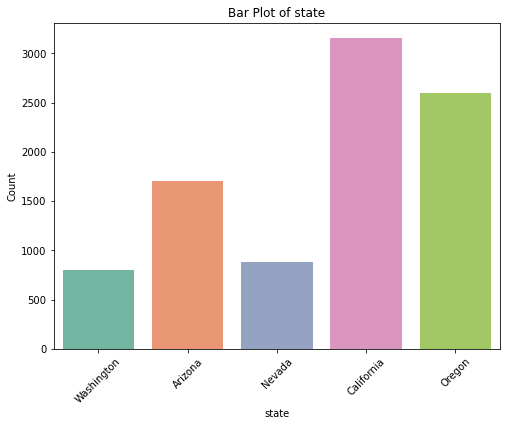

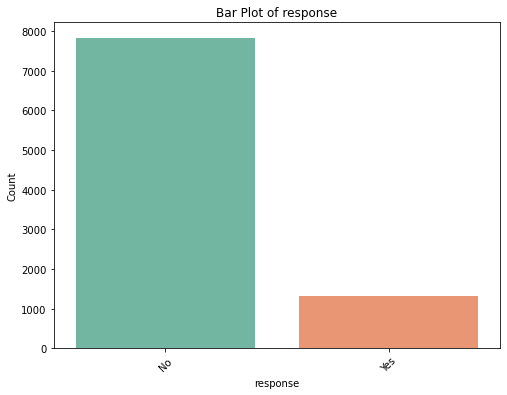

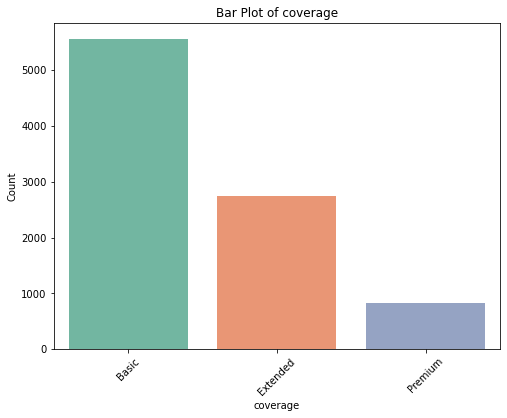

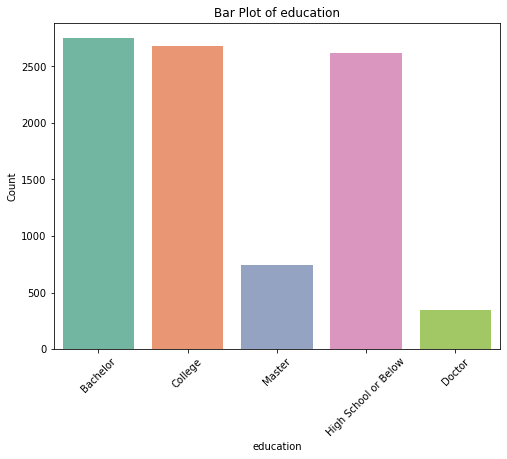

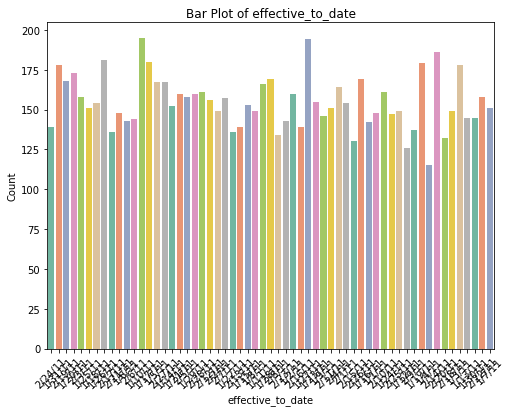

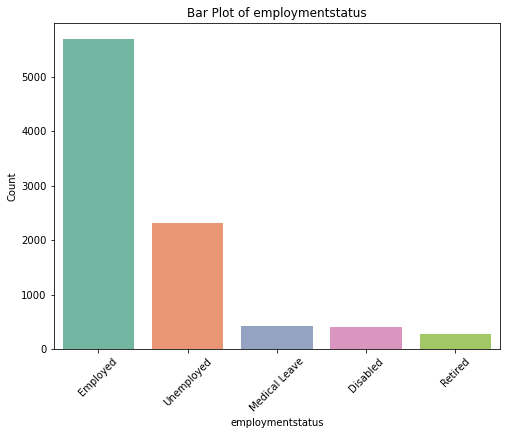

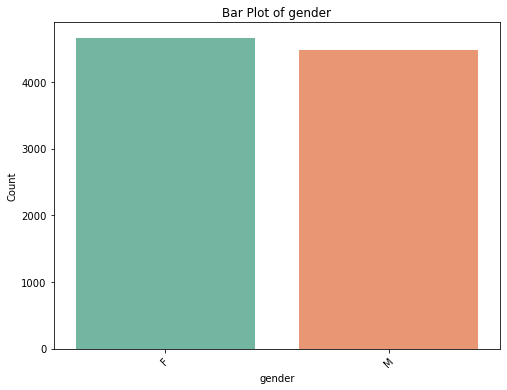

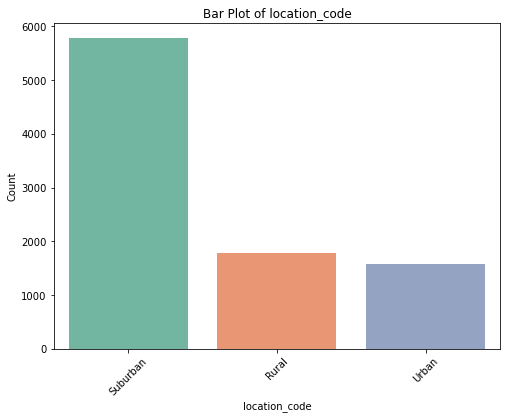

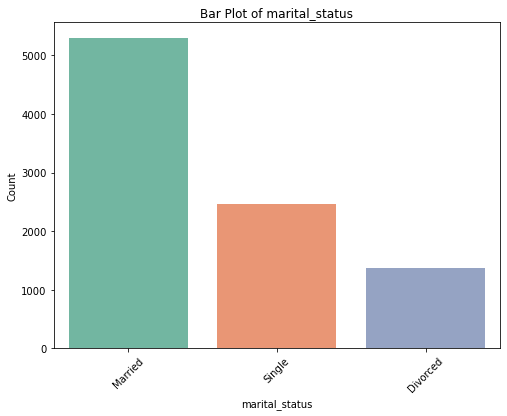

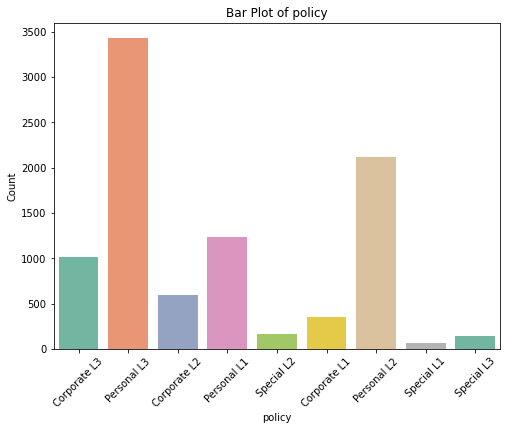

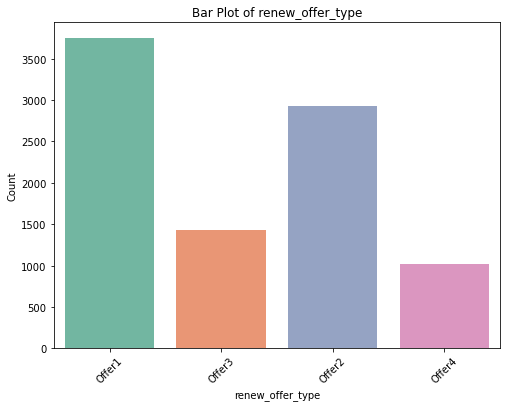

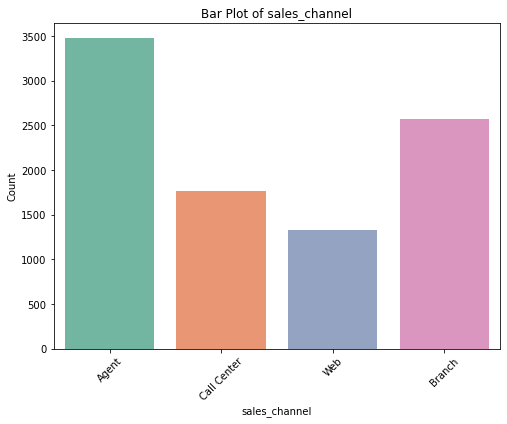

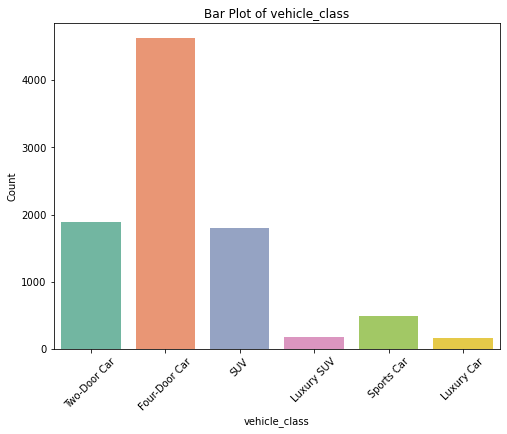

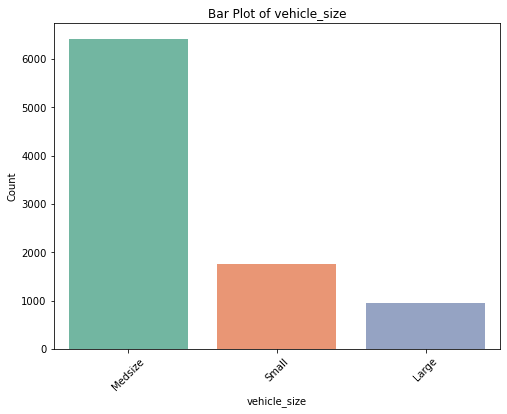

In [16]:
def barplots(dataframe):
    colors = sns.color_palette("Set2")
    
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=dataframe, x=column, palette=colors)
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
        
barplots(df_cat)

In [19]:
# 3. Plotting the time column
data_types = df_cat.dtypes
print (data_types)

df_cat['effective_to_date'] = pd.to_datetime(df_cat['effective_to_date'])

state                object
response             object
coverage             object
education            object
effective_to_date    object
employmentstatus     object
gender               object
location_code        object
marital_status       object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object


In [23]:
# Plot
df_cat['effective_day'] = df_cat['effective_to_date'].dt.day
df_cat['effective_month'] = df_cat['effective_to_date'].dt.month
df_cat

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,month,effective_day,effective_month
0,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,24,2,24,2
1,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize,31,1,31,1
2,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize,19,2,19,2
3,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize,20,1,20,1
4,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal L1,Offer2,Web,Four-Door Car,Medsize,10,2,10,2
9130,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,12,2,12,2
9131,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,6,2,6,2
9132,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large,3,2,3,2


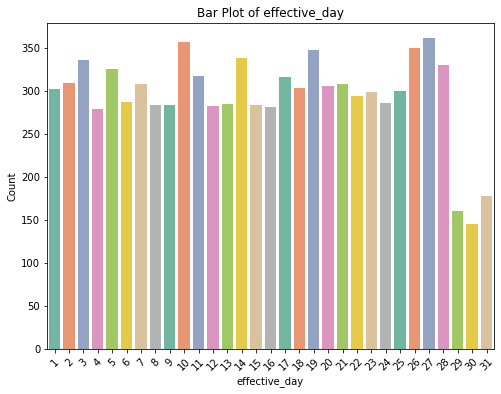

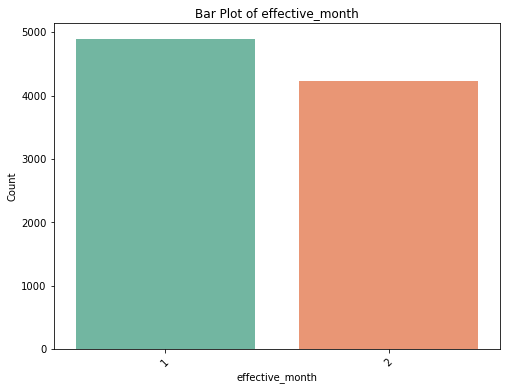

In [24]:
def barplots(dataframe):
    colors = sns.color_palette("Set2")
    
    for column in dataframe.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(data=dataframe, x=column, palette=colors)
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
        
barplots(df_cat[['effective_day', 'effective_month']])

'''
Interpretation:
- At the end of the month, customer are less 'active'.
- January is more 'active' than February
'''